# Data Wrangling

Working on the saved dataset to make the dataset more understandable and easier to extract insights from. 

Basically, I worked on the following aspects : 

1. Handling Missing Values

2. Correcting the data format

3. Standardizing and Normalizing the numerical data

4. Binning data into categories

In [155]:
# importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [156]:
df = pd.read_csv("car-data.csv")
df.head(10)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,3,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,4,2,NaN,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
5,5,1,158.0,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
6,6,1,NaN,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
7,7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
8,9,2,192.0,bmw,gas,std,two,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430
9,10,0,192.0,bmw,gas,std,four,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925


In [157]:
# removing the extra column 
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


### Working on Missing Data
First, we'll identify the amount of missing data

In [158]:
missing_df = df.isnull()
missing_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [159]:
# To get the summary about missing data
for column in missing_df.columns.to_list():
    print(column)
    print(missing_df[column].value_counts(), '\n')

symboling
False    200
Name: symboling, dtype: int64 

normalized-losses
False    164
True      36
Name: normalized-losses, dtype: int64 

make
False    200
Name: make, dtype: int64 

fuel-type
False    200
Name: fuel-type, dtype: int64 

aspiration
False    200
Name: aspiration, dtype: int64 

num-of-doors
False    198
True       2
Name: num-of-doors, dtype: int64 

body-style
False    200
Name: body-style, dtype: int64 

drive-wheels
False    200
Name: drive-wheels, dtype: int64 

engine-location
False    200
Name: engine-location, dtype: int64 

wheel-base
False    200
Name: wheel-base, dtype: int64 

length
False    200
Name: length, dtype: int64 

width
False    200
Name: width, dtype: int64 

height
False    200
Name: height, dtype: int64 

curb-weight
False    200
Name: curb-weight, dtype: int64 

engine-type
False    200
Name: engine-type, dtype: int64 

num-of-cylinders
False    200
Name: num-of-cylinders, dtype: int64 

engine-size
False    200
Name: engine-size, dtype: int64

Replacing data for normalised-losses, stroke, bore, horsepower, peak-rpm with the mean in their respective columns. 

I replaced the 'num-of-doors' attribute by frequency of data in that column, as it is the most likely to occur.

For the price column, we already eliminated the whole row because price is the target and it is not used for prediction. The unavailability of such data is useless.

In [160]:
# replacing missing normalized loss data with mean
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.NaN, avg_norm_loss, inplace=True)

In [161]:
# similarly, doing it for stroke, peak-rpm, horsepower and bore
avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.NaN, avg_stroke, inplace=True)

In [162]:
# This can also be done in a single line
avg_bore = np.mean(df['bore'].astype('float'))
df['bore'].replace(np.NaN, avg_bore, inplace=True)

In [163]:
avg_hp = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.NaN, avg_hp, inplace=True)

In [164]:
df['peak-rpm'].replace(np.NaN, df['peak-rpm'].astype('float').mean(axis=0), inplace=True)

Now,replacing num-of-doors values with the mot frequent value for that attribute.

In [165]:
df['num-of-doors'].value_counts()

four    113
two      85
Name: num-of-doors, dtype: int64

In [166]:
#replacing NANs with 'four'
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

In [167]:
df['num-of-doors'].value_counts()

four    115
two      85
Name: num-of-doors, dtype: int64

### Data Formatting
I worked on the data formats of the respective columns and converted into the required formats for further analysis. Also, for some columns pandas labels them with the wrong datatypes so I changed datatypes.

In [168]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [169]:
# bore attribute should be off float type as it has decimal numbers
df[['bore']] = df[['bore']].astype('float')

# horsepower and peak-rpm can be float
df[['horsepower','peak-rpm']] = df[['horsepower','peak-rpm']].astype('float')
df[['price']] = df[['price']].astype('float')

# normalised-losses should be of float
df[['normalized-losses']] = df[['normalized-losses']].astype('float')

In [170]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Standardizing data
Converting the data city-mpg and highway-mpg into L/100km so that it's converted into standardized metric system that's more commonly recognized.

Miles/Gallon can be converted into L/100km by using this conversion

1 mile/gallon = 0.425 km/L

1L/0.425km = 235 L/100km (approximately)

In [171]:
# converting the units for highway
df['highway-L/100km'] = 235/df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,8.703704
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,9.038462
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,7.833333
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,10.681818
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,9.400000


In [172]:
# similarly for city-mpg values
df['city-L/100km'] = 235/df['city-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,8.703704,11.190476
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,9.038462,12.368421
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,7.833333,9.791667
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,10.681818,13.055556
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,9.400000,12.368421


### Normalizing data
Normalizing data brings the values of the attributes between the range 0 and 1. So the values all come down to scalable similar ranges.
There are multiple techniques but I simply divided the values with the max column values

In [173]:
df['normalized-height'] = df['height'] / max(df['height'])
df['normalized-width'] = df['width'] / max(df['width'])
df['normalized-length'] = df['length'] / max(df['length'])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,normalized-height,normalized-width,normalized-length
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,16500.0,8.703704,11.190476,0.816054,0.890278,0.811148
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154.0,5000.0,19,26,16500.0,9.038462,12.368421,0.876254,0.909722,0.822681
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,102.0,5500.0,24,30,13950.0,7.833333,9.791667,0.908027,0.919444,0.848630
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,115.0,5500.0,18,22,17450.0,10.681818,13.055556,0.908027,0.922222,0.848630
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,110.0,5500.0,19,25,15250.0,9.400000,12.368421,0.887960,0.920833,0.851994


### Binning data
Transformed some of the continuous data attributes into groups like horsepower.

In [174]:
df['horsepower']

0      111.0
1      154.0
2      102.0
3      115.0
4      110.0
       ...  
195    114.0
196    160.0
197    134.0
198    106.0
199    114.0
Name: horsepower, Length: 200, dtype: float64

Text(0.5, 1.0, 'horsepower bins')

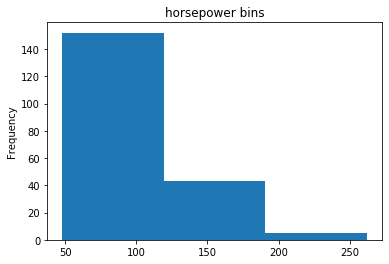

In [190]:
df['horsepower'].plot(kind='hist', bins=3)
plt.title("horsepower bins")

In [195]:
# Hence, I'll make 3 bins according the horsepower values
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [196]:
grs = ['Low','Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=grs, include_lowest=True)

In [197]:
df['horsepower-binned']

0         Low
1      Medium
2         Low
3         Low
4         Low
        ...  
195       Low
196    Medium
197    Medium
198       Low
199       Low
Name: horsepower-binned, Length: 200, dtype: category
Categories (3, object): [Low < Medium < High]

In [198]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,normalized-height,normalized-width,normalized-length,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,27,16500.0,8.703704,11.190476,0.816054,0.890278,0.811148,Low
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,26,16500.0,9.038462,12.368421,0.876254,0.909722,0.822681,Medium
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,30,13950.0,7.833333,9.791667,0.908027,0.919444,0.848630,Low
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,22,17450.0,10.681818,13.055556,0.908027,0.922222,0.848630,Low
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,5500.0,19,25,15250.0,9.400000,12.368421,0.887960,0.920833,0.851994,Low


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

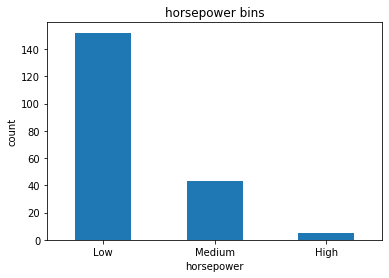

In [209]:
df['horsepower-binned'].value_counts().plot(kind='bar')
plt.title('horsepower bins')
plt.xlabel('horsepower')
plt.ylabel('count')
plt.xticks(rotation=0)

In [210]:
# I'll do the same for price

In [213]:
price_bin = np.linspace(min(df['price']), max(df['price']), 4)
df['price-binned'] = pd.cut(df['price'], price_bin, labels=grs)

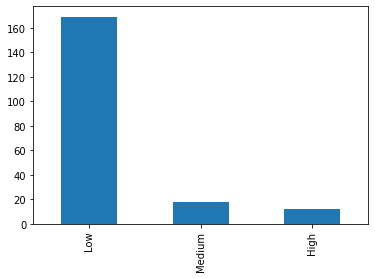

In [216]:
df['price-binned'].value_counts().plot(kind='bar')

### Saving the clean dataset

In [217]:
df.to_csv('clean_df.csv')

#### Phew!! Finally done with cleaning dataset